In [1]:
import os
from scipy.interpolate import griddata
from netCDF4 import Dataset
import pandas as pd

In [48]:
paracousti_path = "H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\Paracousti_files\Device_Present"
paracousti_files = [os.path.join(paracousti_path, i) for i in os.listdir(paracousti_path) if i.endswith('.nc')]
species_probability_path = "H:\Projects\C1308_SEAT\Acoustics\Output\Whales"

In [3]:
boundary_conditions = pd.read_csv(r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\DEMO paracousti\Probability\boundary_conditions.csv").set_index('Paracousti File').fillna(0)

In [4]:
for ic, paracousti_file in enumerate(paracousti_files):
    ds = Dataset(paracousti_file)
    spl = ds.variables['totSPL'][:].data
    cords = ds.variables['totSPL'].coordinates.split()
    X = ds.variables[cords[0]][:].data
    Y = ds.variables[cords[1]][:].data
    import numpy as np
    if X.shape[0] != spl.shape[0]:
        spl = np.transpose(spl, (1, 2, 0))
    if ic==0:
        xunits = ds.variables['XCOR'].units
        if 'degrees' in xunits:
            XCOR = np.where(X<0, X+360, X)
        else:
            XCOR = X
        YCOR = Y
        SPL = np.zeros((len(paracousti_files), np.shape(spl)[0], np.shape(spl)[1], np.shape(spl)[2]))
    SPL[ic,:] = spl

In [5]:
(7.4-6.5)/6.5

0.13846153846153852

In [6]:
SPL_depth_max = np.nanmax(SPL, axis=3)
SPL_depth_max.shape

(14, 120, 119)

C:\Users\local_tnelson76\Temp\ipykernel_64608\2734141228.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(XCOR,YCOR,SPL_depth_max[0,:])


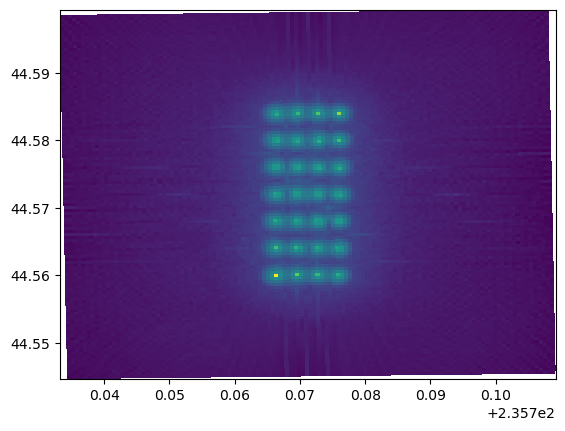

In [7]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
ax.pcolormesh(XCOR,YCOR,SPL_depth_max[0,:])

In [8]:
boundary_conditions

,WhaleWatch File,Probability,Unnamed: 3
Paracousti File,,,
PacWave_3DSPLs_Hw0.5.nc,WhaleWatchPredictions_2021_01.csv,0.00,0.0
PacWave_3DSPLs_Hw1.0.nc,WhaleWatchPredictions_2021_02.csv,2.73,0.0
PacWave_3DSPLs_Hw1.5.nc,WhaleWatchPredictions_2021_03.csv,6.00,0.0
PacWave_3DSPLs_Hw2.0.nc,WhaleWatchPredictions_2021_04.csv,16.00,0.0
PacWave_3DSPLs_Hw2.5.nc,WhaleWatchPredictions_2021_05.csv,10.00,0.0
PacWave_3DSPLs_Hw3.0.nc,WhaleWatchPredictions_2021_06.csv,3.00,0.0
PacWave_3DSPLs_Hw3.5.nc,WhaleWatchPredictions_2021_07.csv,3.50,0.0
PacWave_3DSPLs_Hw4.0.nc,WhaleWatchPredictions_2021_08.csv,4.00,0.0
PacWave_3DSPLs_Hw4.5.nc,WhaleWatchPredictions_2021_09.csv,4.50,0.0


In [33]:
boundary_conditions['Probability'] = 100 * boundary_conditions.Probability/ boundary_conditions.Probability.sum()

In [35]:
stressor = np.zeros(XCOR.shape)
for ic, file in enumerate(paracousti_files):
    paracousti_file = os.path.basename(file)
    probability = boundary_conditions.loc[os.path.basename(paracousti_file)]['Probability'] / 100
    stressor = stressor + probability * SPL_depth_max[ic,:]


In [37]:
np.nanmax(stressor)

160.37074135410788

C:\Users\local_tnelson76\Temp\ipykernel_64608\2896137107.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h0 = ax[0].pcolormesh(XCOR,YCOR,SPL_depth_max[0,:], vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
C:\Users\local_tnelson76\Temp\ipykernel_64608\2896137107.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h1 = ax[1].pcolormesh(XCOR,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
C:\Users\local_tnelson76\Temp\ipykernel_64608\2896137107.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically i

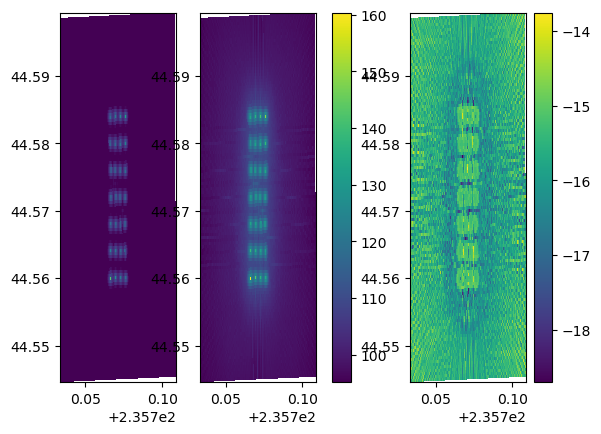

In [44]:
fig,ax = plt.subplots(ncols=3)
h0 = ax[0].pcolormesh(XCOR,YCOR,SPL_depth_max[0,:], vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
h1 = ax[1].pcolormesh(XCOR,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
h2 = ax[2].pcolormesh(XCOR,YCOR,SPL_depth_max[0,:] - stressor)
plt.colorbar(h0, ax=ax[0:2])
plt.colorbar(h2, ax=ax[-1])


In [106]:
def create_whale_array(species_filename, x, y, latlon=False):
    # if ((receptor_filename is not None) or (not receptor_filename == "")):
    if not((species_filename is None) or (species_filename == "")):
        if species_filename.endswith('.tif'):
            data = gdal.Open(species_filename)
            img = data.GetRasterBand(1)
            receptor_array = img.ReadAsArray()
            receptor_array[receptor_array < 0] = 0
            (upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = data.GetGeoTransform()
            cols = data.RasterXSize
            rows = data.RasterYSize
            r_rows = np.arange(rows) * y_size + upper_left_y + (y_size / 2)
            r_cols = np.arange(cols) * x_size + upper_left_x + (x_size / 2)
            if latlon==True:
                r_cols = np.where(r_cols<0, r_cols+360, r_cols)
            x_grid, y_grid = np.meshgrid(r_cols, r_rows)
            array = griddata((x_grid.flatten(), y_grid.flatten()), receptor_array.flatten(), (x,y), method='nearest', fill_value=0)
            return array

        elif species_filename.endswith('.csv'):
            df = pd.read_csv(species_filename) 
            columns_keep = ['latitude', 'longitude', 'percent', 'density']
            df = df[columns_keep]
            if latlon==True:
                df.longitude = df.longitude-360
            probability_array = griddata((df.longitude.to_numpy(), df.latitude.to_numpy()), df.percent.to_numpy(), (x,y), method='nearest', fill_value=0)
            density_array = griddata((df.longitude.to_numpy(), df.latitude.to_numpy()), df.density.to_numpy(), (x,y), method='nearest', fill_value=0)
            return probability_array, density_array
        else:
            raise Exception("Invalid File Type. Must be of type .tif or .csv")
    else:
        # taucrit without a receptor
        #Assume the following grain sizes and conditions for typical beach sand (Nielsen, 1992 p.108)
        probability_array = np.ones(x.shape)
        density_array = np.ones(x.shape)
        return probability_array, density_array

In [111]:
Species_Probability = []
Species_Density = []
for paracousti_file in paracousti_files:
    species_filename = boundary_conditions.loc[os.path.basename(paracousti_file)]['WhaleWatch File']
    if species_filename.endswith('.csv'):
        parray, darray = create_whale_array(os.path.join(species_probability_path, species_filename), x, y, latlon=True)
    elif species_filename.endswith('.tif'):
        parray = create_whale_array(os.path.join(species_probability_path, species_filename), x, y, latlon=True)
        darray = create_whale_array(os.path.join(species_probability_path, species_filename), x, y, latlon=True)
        #need percentage and density column in boundary_conditions
    Species_Probability.append(parray)
    Species_Density.append(darray)
#Average density (# whales per 25km x 25km grid cell)


C:\Users\local_tnelson76\Temp\ipykernel_64608\2464157448.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(XCOR,YCOR,Species_Probability[0])


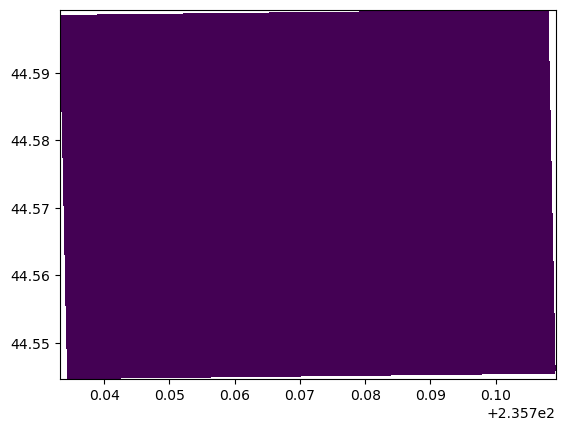

In [116]:
fig,ax = plt.subplots()
ax.pcolormesh(XCOR,YCOR,Species_Probability[0])

In [ ]:
# Create stressor above threshold for each paracousti
# Create cumulative probability of whale present and impacted 
# Create total number of whales potentially impacted